# 2.Data loading & Exploration

In [26]:
import pandas as pd

df = pd.read_csv("owid-covid-data.csv")



### columns

In [27]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

### Rows

In [2]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


### Identifying missing values

In [3]:
df.isnull().sum()

iso_code                                        0
continent                                   16665
location                                        0
date                                            0
total_cases                                 37997
                                            ...  
population                                      0
excess_mortality_cumulative_absolute       337901
excess_mortality_cumulative                337901
excess_mortality                           337901
excess_mortality_cumulative_per_million    337901
Length: 67, dtype: int64

# 3. Data Cleaning

## Filtering countries

In [13]:
countries = ['Kenya', 'United States', 'India']
df_countries = df[df['location'].isin(countries)].copy()

### Converting date column to datetime

In [20]:
df_countries.loc[:, 'date'] = pd.to_datetime(df_countries['date'])
df_countries.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
139773,IND,Asia,India,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,20.6,59.55,0.53,69.66,0.645,1.417173e+09,NaN,NaN,NaN,NaN
139774,IND,Asia,India,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,20.6,59.55,0.53,69.66,0.645,1.417173e+09,NaN,NaN,NaN,NaN
139775,IND,Asia,India,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,20.6,59.55,0.53,69.66,0.645,1.417173e+09,NaN,NaN,NaN,NaN
139776,IND,Asia,India,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,20.6,59.55,0.53,69.66,0.645,1.417173e+09,NaN,NaN,NaN,NaN
139777,IND,Asia,India,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,20.6,59.55,0.53,69.66,0.645,1.417173e+09,NaN,NaN,NaN,NaN


In [21]:
df_countries.dtypes

iso_code                                           object
continent                                          object
location                                           object
date                                       datetime64[ns]
total_cases                                       float64
                                                ...      
population                                        float64
excess_mortality_cumulative_absolute              float64
excess_mortality_cumulative                       float64
excess_mortality                                  float64
excess_mortality_cumulative_per_million           float64
Length: 67, dtype: object

### Dropping rows missing data/critical values

In [23]:
df_countries = df_countries.dropna(subset=['total_cases'])
df_countries.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
139800,IND,Asia,India,2020-01-30,1.0,1.0,0.143,NaN,0.0,0.0,...,20.6,59.55,0.53,69.66,0.645,1.417173e+09,NaN,NaN,NaN,NaN
139801,IND,Asia,India,2020-01-31,5.0,4.0,0.714,NaN,0.0,0.0,...,20.6,59.55,0.53,69.66,0.645,1.417173e+09,NaN,NaN,NaN,NaN
139802,IND,Asia,India,2020-02-01,5.0,0.0,0.714,NaN,0.0,0.0,...,20.6,59.55,0.53,69.66,0.645,1.417173e+09,NaN,NaN,NaN,NaN
139803,IND,Asia,India,2020-02-02,2.0,NaN,NaN,NaN,0.0,0.0,...,20.6,59.55,0.53,69.66,0.645,1.417173e+09,NaN,NaN,NaN,NaN
139804,IND,Asia,India,2020-02-03,3.0,1.0,0.857,NaN,0.0,0.0,...,20.6,59.55,0.53,69.66,0.645,1.417173e+09,NaN,NaN,NaN,NaN


### Filling missing values in numeric columns

In [25]:
df_countries.fillna(0, inplace=True)
df_countries.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
139800,IND,Asia,India,2020-01-30,1.0,1.0,0.143,0.0,0.0,0.0,...,20.6,59.55,0.53,69.66,0.645,1.417173e+09,0.0,0.0,0.0,0.0
139801,IND,Asia,India,2020-01-31,5.0,4.0,0.714,0.0,0.0,0.0,...,20.6,59.55,0.53,69.66,0.645,1.417173e+09,0.0,0.0,0.0,0.0
139802,IND,Asia,India,2020-02-01,5.0,0.0,0.714,0.0,0.0,0.0,...,20.6,59.55,0.53,69.66,0.645,1.417173e+09,0.0,0.0,0.0,0.0
139803,IND,Asia,India,2020-02-02,2.0,0.0,0.000,0.0,0.0,0.0,...,20.6,59.55,0.53,69.66,0.645,1.417173e+09,0.0,0.0,0.0,0.0
139804,IND,Asia,India,2020-02-03,3.0,1.0,0.857,0.0,0.0,0.0,...,20.6,59.55,0.53,69.66,0.645,1.417173e+09,0.0,0.0,0.0,0.0


# 4. Exploratory Data Analysis(EDA)

### Plot total cases over time 

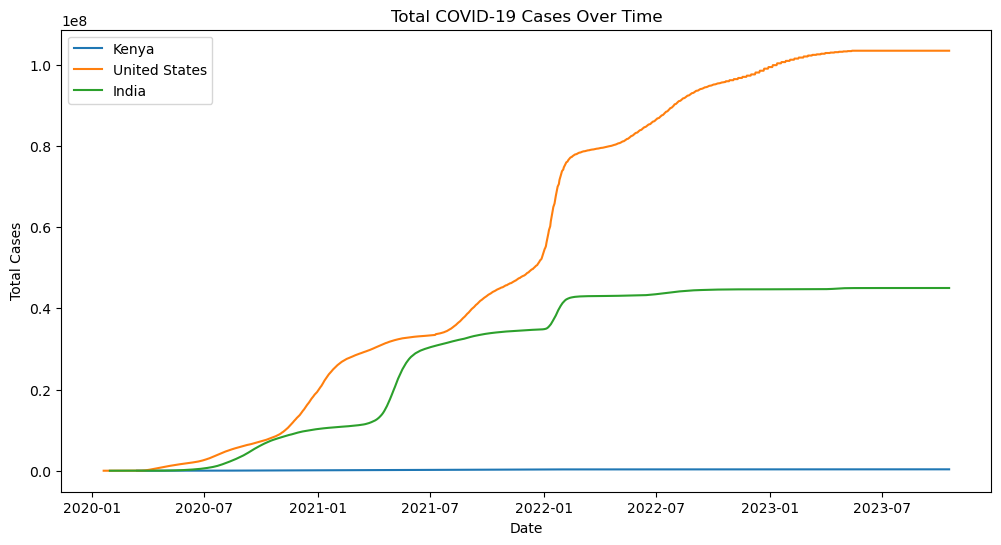

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
for country in countries:
    data = df_countries[df_countries['location'] == country]
    plt.plot(data['date'], data['total_cases'], label=country)

plt.title('Total COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()
plt.show()


### Plot total deaths over time

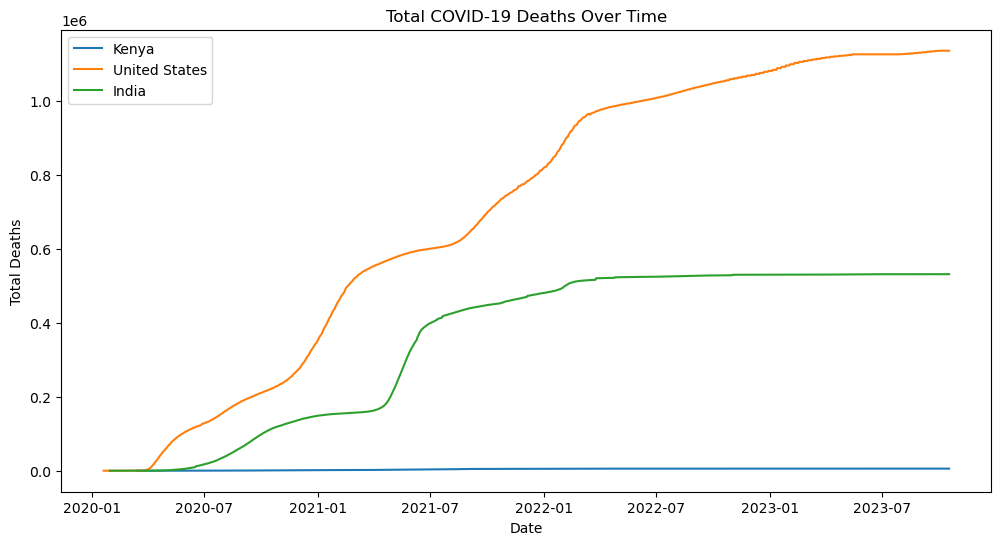

In [29]:
plt.figure(figsize=(12,6))
for country in countries:
    data = df_countries[df_countries['location'] == country]
    plt.plot(data['date'], data['total_deaths'], label=country)

plt.title('Total COVID-19 Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.legend()
plt.show()


### Compare daily new cases

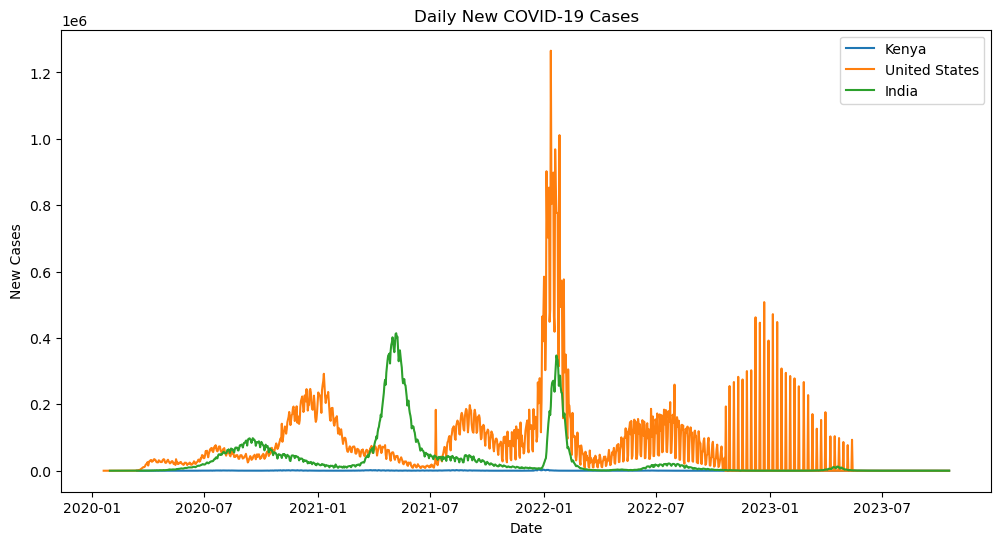

In [30]:
plt.figure(figsize=(12,6))
for country in countries:
    data = df_countries[df_countries['location'] == country]
    plt.plot(data['date'], data['new_cases'], label=country)

plt.title('Daily New COVID-19 Cases')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.legend()
plt.show()


### Calculate and plot death rate

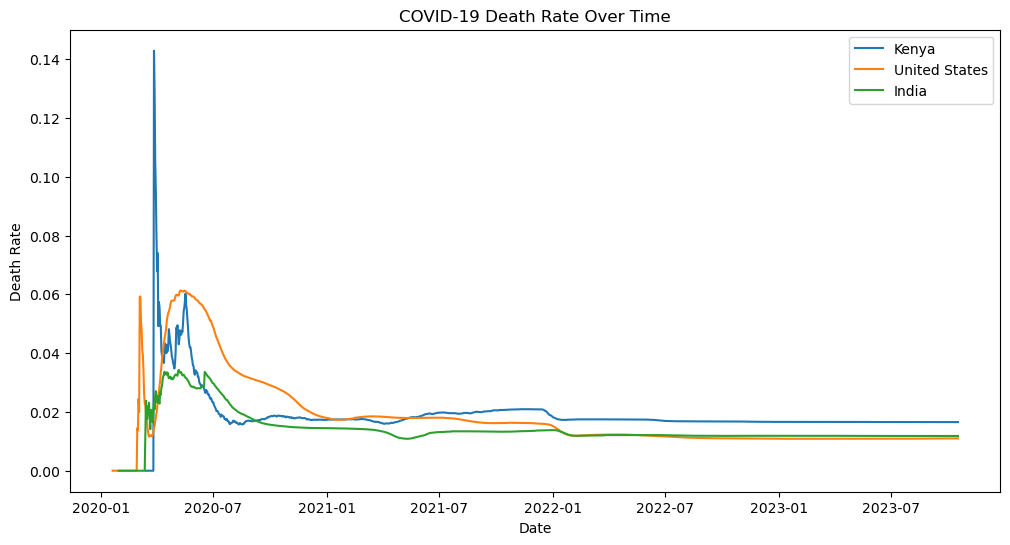

In [31]:
df_countries['death_rate'] = df_countries['total_deaths'] / df_countries['total_cases']

plt.figure(figsize=(12,6))
for country in countries:
    data = df_countries[df_countries['location'] == country]
    plt.plot(data['date'], data['death_rate'], label=country)

plt.title('COVID-19 Death Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Death Rate')
plt.legend()
plt.show()


 # 5. Visualizing Vaccination Progress

### Plot cumulative vaccinations over time

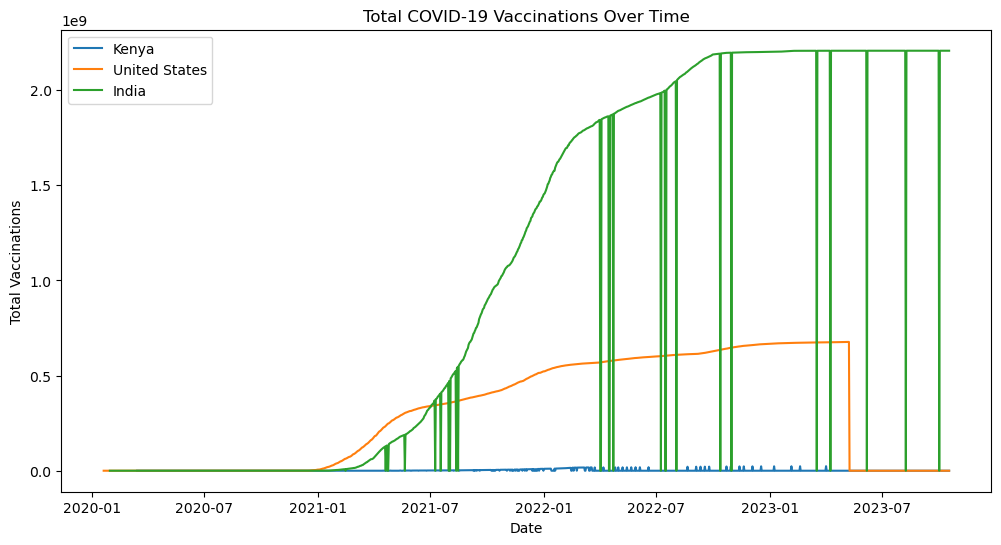

In [32]:
plt.figure(figsize=(12,6))
for country in countries:
    data = df_countries[df_countries['location'] == country]
    plt.plot(data['date'], data['total_vaccinations'], label=country)

plt.title('Total COVID-19 Vaccinations Over Time')
plt.xlabel('Date')
plt.ylabel('Total Vaccinations')
plt.legend()
plt.show()


### Optional — Plot % vaccinated (fully vaccinated)

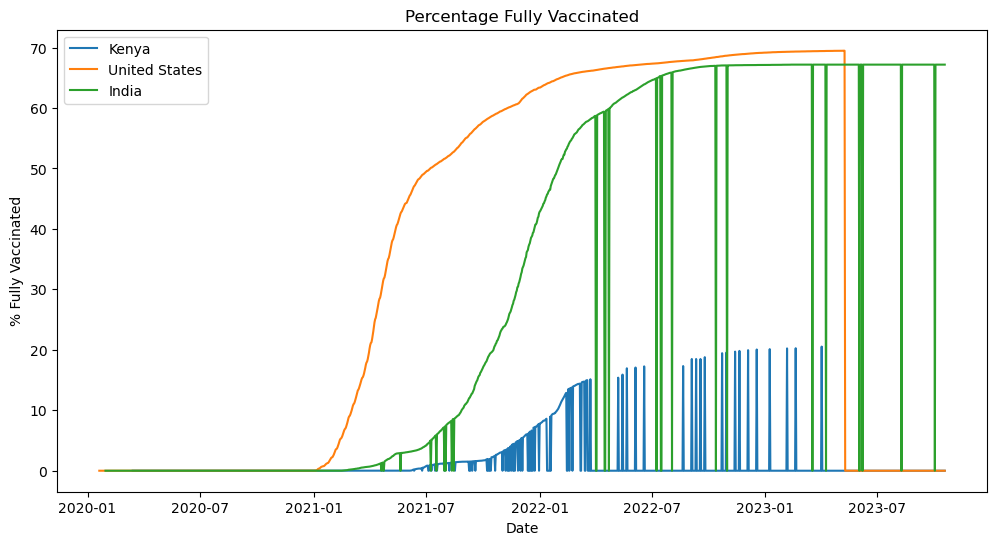

In [33]:
plt.figure(figsize=(12,6))
for country in countries:
    data = df_countries[df_countries['location'] == country]
    plt.plot(data['date'], data['people_fully_vaccinated_per_hundred'], label=country)

plt.title('Percentage Fully Vaccinated')
plt.xlabel('Date')
plt.ylabel('% Fully Vaccinated')
plt.legend()
plt.show()


# Step 6 : Creatng a Choropleth Map

### Prepare latest data

In [34]:
latest_date = df['date'].max()
df_latest = df[df['date'] == latest_date]

map_data = df_latest[['iso_code', 'location', 'total_cases']].dropna()


### Plot choropleth map with Plotly

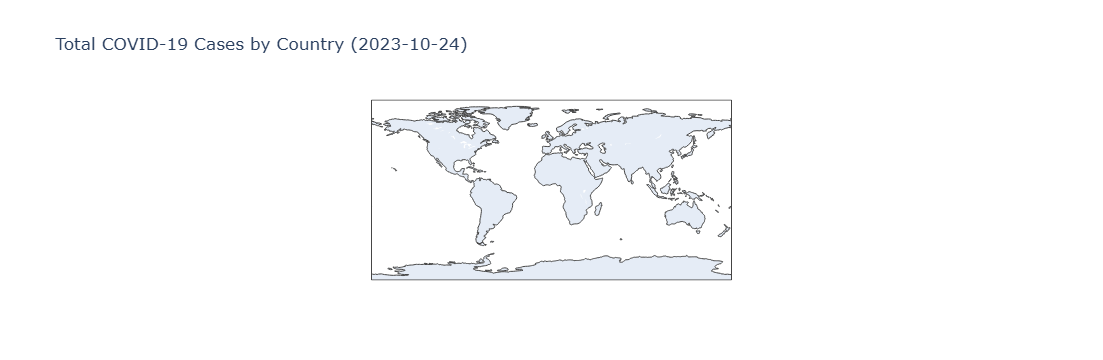

In [36]:
import plotly.express as px

fig = px.choropleth(map_data,
                    locations="iso_code",
                    color="total_cases",
                    hover_name="location",
                    color_continuous_scale="Reds",
                    title=f'Total COVID-19 Cases by Country ({latest_date})')

fig.show()


# 7.Report findings
### – "The USA had the highest total cases as of 2020-2023 date"
### – "Kenya had a slower vaccination rollout compared to India"
### – "India experienced a large second wave in mid-2021"